<div id="container" style="position:relative;">
<div style="float:left"><h1> Forecasting Bakery Sales - Abi Magnall </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

# Notebook 2 : Weather Cleaning and EDA 

Source of this dataset: National Centres For Environmental Information: *https://www.noaa.gov/*

Data dictionary: 

- TMAX - Maximum temperature in Farenheight
- TAVG - Average Temperature in Farenheight
- TMIN - Minimum temperature in Farenheight
- PRCP - Precipitation, in inches
- SNWD - Snow depth, in inches

This dataset shows the daily weather from the Wattisham weather station from 01/09/2020 to 30/09/2022. This weather station was selected as it was the closest to all four bakeries that have been sampled, all within 30-40 minutes from the weather station. 

**N.B** Normal base python kernal is required for this notebook, not the `bakery` notebook. 

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime as dt
import time
import os

## Getting the Working Directory

In [2]:
working_directory = os.getcwd()
print(working_directory)

/Users/abimagnall/Documents/BrainStation/Capstone/Data/Abi_Magnall_Captsone_Project


## Importing Raw Dataset

In [3]:
raw_weather = pd.read_csv(working_directory+'/1_raw_data/raw_weather_data.csv')

In [4]:
# To validate it worked
raw_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,UKM00003590,"WATTISHAM, UK",52.127,0.956,86.6,01/09/2020,0.00,",,S",NaN,NaN,56,"H,,S",NaN,NaN,47.0,",,S"
1,UKM00003590,"WATTISHAM, UK",52.127,0.956,86.6,02/09/2020,0.00,",,S",NaN,NaN,59,"H,,S",NaN,NaN,48.0,",,S"
2,UKM00003590,"WATTISHAM, UK",52.127,0.956,86.6,03/09/2020,0.07,",,S",NaN,NaN,63,"H,,S",NaN,NaN,56.0,",,S"
3,UKM00003590,"WATTISHAM, UK",52.127,0.956,86.6,04/09/2020,0.08,",,S",NaN,NaN,59,"H,,S",NaN,NaN,52.0,",,S"
4,UKM00003590,"WATTISHAM, UK",52.127,0.956,86.6,05/09/2020,0.01,",,S",NaN,NaN,55,"H,,S",NaN,NaN,46.0,",,S"


# Data Exploration
First the data will be assessed to determine what data is present in the raw datafile, if there are any duplicated rows if data or missing values. 

In [5]:
# A copy of the raw dataset is taken for audit trail purposes
clean_weather = raw_weather[['DATE', 'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNWD']].copy()

In [6]:
# info is called to get an overview of the shape of the dataframe
clean_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    760 non-null    object 
 1   TAVG    760 non-null    int64  
 2   TMAX    284 non-null    float64
 3   TMIN    433 non-null    float64
 4   PRCP    600 non-null    float64
 5   SNWD    11 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 35.8+ KB


It can be seen that there are 760 rows of data and 6 columns. Only the `DATE` and `TAVG` columns aren't missing any values. It can also be seen that the `DATE` column is the incorrect datatype, which will need to be converted. 

In [7]:
# To determine the number of duplicated rows of data
clean_weather.duplicated().sum()

0

In [8]:
# To count the number of missing rows of data for each column
clean_weather.isna().sum()

DATE      0
TAVG      0
TMAX    476
TMIN    327
PRCP    160
SNWD    749
dtype: int64

## Observations

- It can be seen that `TMAX`, `TMIN`, `PRCP` and `SNWD` all have missing values. For the modelling phase, only the average temperature is required as this will be more useful that the minimum or maximum temperatures. Therefore, `TMA` and `TMIN` can be dropped 
- An assumption is made that for the missing rows of data in the columns `PRCP` and `SNWD`, that they are empty where there has been 0 rain or snowfall. Therefore, these will be populated with 0
- There are no duplicated rows
- `SNWD` only contains 11 rows of data, which would provide little insight into predicted revenue for over 760 days of data, therefore it should either be dropped or combined with another column 

---

## Data Cleaning
The steps taken here are:
- `TMIN` and `TMAX` columns are dropped
- `DATE` column converted to datetime
- `SNWD` column combined with `PRCP` column 

In [9]:
# To drop the tmax and tmin columns
clean_weather = clean_weather.drop(columns=['TMAX', 'TMIN'])
# To validate it worked
clean_weather.head()

,DATE,TAVG,PRCP,SNWD
0,01/09/2020,56,0.00,NaN
1,02/09/2020,59,0.00,NaN
2,03/09/2020,63,0.07,NaN
3,04/09/2020,59,0.08,NaN
4,05/09/2020,55,0.01,NaN


In [10]:
# Converting the date column to datetime with the same format as the bakery data 
clean_weather['DATE'] =  pd.to_datetime(clean_weather['DATE'], format='%d/%m/%Y')

In [11]:
# clean_weather['DATE'] = clean_weather['DATE'].astype('datetime64')

In [12]:
# Validate it worked 
clean_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    760 non-null    datetime64[ns]
 1   TAVG    760 non-null    int64         
 2   PRCP    600 non-null    float64       
 3   SNWD    11 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 23.9 KB


In [13]:
# A copy of the dataset is taken for audit trail purposes 
processed_weather = clean_weather.copy()

As the `SNWD` column only contains 11 rows of data, they will be added into the `PRCP` column as alone they will not provide insight as there is insufficient data to build a model of and for sales to be dependent on. 

In [14]:
# Missing values in PRCP and SNWD are filled with 0
processed_weather['PRCP'].fillna(0,inplace=True)
processed_weather['SNWD'].fillna(0,inplace=True)

In [15]:
# The SNWD values are added onto the PRCP values 
processed_weather['PRCP'] = processed_weather['PRCP'] + processed_weather['SNWD']

In [16]:
# The now redundant column SNWD is dropped
processed_weather.drop(columns=['SNWD'],inplace=True)

In [17]:
# To validate the columns were correctly filled and dropped
processed_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    760 non-null    datetime64[ns]
 1   TAVG    760 non-null    int64         
 2   PRCP    760 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 17.9 KB


# Weather EDA
The values in the dataset will now be explored to identify any outliers or anomalies in the dataset.

First the `.describe` method is called to get a statistical summary of the numerical values. 

In [18]:
# To get a statistical summary of the numerical values 
processed_weather.describe()

,TAVG,PRCP
count,760.000000,760.000000
mean,51.373684,0.130303
std,10.111361,0.717634
min,27.000000,0.000000
25%,43.000000,0.000000
50%,51.000000,0.000000
75%,60.000000,0.050000
max,84.000000,11.010000


It can be seen from the data dictionary and the max values from the describe method that the `TAVG` is in Fahrenheit so this will be converted to Celsius. 

In [19]:
# To convert Fahrenheit to Celsius
processed_weather['TAVG'] = processed_weather['TAVG']-32

In [20]:
# Re-calling describe to assess the numerical values 
processed_weather.describe()

,TAVG,PRCP
count,760.000000,760.000000
mean,19.373684,0.130303
std,10.111361,0.717634
min,-5.000000,0.000000
25%,11.000000,0.000000
50%,19.000000,0.000000
75%,28.000000,0.050000
max,52.000000,11.010000


There appears to be an outlier TAVG of 52 degrees Celcius. To explore this further the distriubtion will be plotted as a histogram. 

<AxesSubplot:xlabel='TAVG', ylabel='Count'>

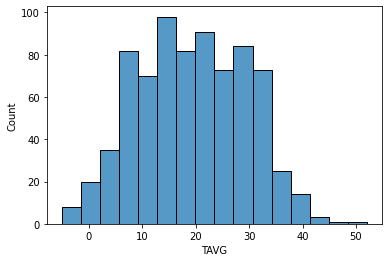

In [21]:
sns.histplot(data=processed_weather['TAVG'])

From the histogram it can be seen that there are values over 40 degrees Celcius, which seems particularly high for England. 

Through additional research that the max temperature reached in Suffolk was c.38 Degrees Celcius (in 2022) and c.35 for 2021. Therefore, any `TAVG` above these values will be reduced to 35 degrees for 2021 and 28 for 2022. 

In [22]:
# A new slice is taken to identify the rows of data with temperatures above 35 degrees celcius 
hot_dates = processed_weather[processed_weather['TAVG']>35]

In [23]:
# To view the hot_dates
hot_dates.head()

,DATE,TAVG,PRCP
14,2020-09-15,37,0.0
286,2021-06-14,36,0.0
288,2021-06-16,36,0.0
320,2021-07-18,38,0.0
321,2021-07-19,36,0.0


In [24]:
# For loop to convert rows for the year 2021 to 35 degrees and 2022 to 38
for row in hot_dates.index:
    if row in [17,18,20,68,69]:
        processed_weather.loc[row,'TAVG'] = 35
    else:
        if hot_dates.loc[row,'TAVG'] > 38:
            processed_weather.loc[row,'TAVG'] = 38

In [25]:
# To validate it worked 
processed_weather.describe()

,TAVG,PRCP
count,760.000000,760.000000
mean,19.296053,0.130303
std,9.939633,0.717634
min,-5.000000,0.000000
25%,11.000000,0.000000
50%,19.000000,0.000000
75%,28.000000,0.050000
max,38.000000,11.010000


Confirmed now the temp, rain and snow are all valid. 

In [26]:
# The date column is renamed to match the other datasets to ease merging in data preprocessing stage 
processed_weather.rename(columns={'DATE':'Date'},inplace=True)
processed_weather

,Date,TAVG,PRCP
0,2020-09-01,24,0.00
1,2020-09-02,27,0.00
2,2020-09-03,31,0.07
3,2020-09-04,27,0.08
4,2020-09-05,23,0.01
...,...,...,...
755,2022-09-26,20,0.09
756,2022-09-27,16,0.04
757,2022-09-28,16,0.15
758,2022-09-29,18,0.01


## To Validate All Dates are Present in the Dataset
For timeseries analaysis there need to be rows of data for every date. Therefore to validate all dates are present the first and last day in the dataset will be indentified, and any missing values determined using `.difference()`.

In [27]:
first_day = processed_weather['Date'].min()
last_day=processed_weather['Date'].max()
full_range = pd.date_range(start=first_day, end=last_day, freq='D')

# to identify the missing dates in the dataframe 
full_range.difference(processed_weather['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [28]:
processed_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    760 non-null    datetime64[ns]
 1   TAVG    760 non-null    int64         
 2   PRCP    760 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 17.9 KB


### Observations
It can be seen that no dates were returned in the first step, suggesting that all dates are present in the `Date` column. In addition to this, the length of the dataframe is 760 days which is the correct length of days between 01/09/2020 and 30/09/2022. Therefore, all the dates are present in the dataset, there are no null values, redundant columns of duplicated rows, so the processed dataset can be saved. 

In [29]:
# To save the dataset
processed_weather.to_csv(working_directory+'/3_preprocessed_data/processed_weather.csv',index=False)

In [30]:
# To validate the dataset saved correctly 
new_weather = pd.read_csv(working_directory+'/3_preprocessed_data/processed_weather.csv')

In [31]:
new_weather.head()

,Date,TAVG,PRCP
0,2020-09-01,24,0.00
1,2020-09-02,27,0.00
2,2020-09-03,31,0.07
3,2020-09-04,27,0.08
4,2020-09-05,23,0.01


# Next Steps
The bakery datasets will now be cleaned, which can found here: [Bakery Data Cleaning](./3_Bakery_Data_Cleaning.ipynb)

>[Return to Contents](#Contents)